In [83]:
import numpy as np # for matrix operations and fast math functions
import scipy.signal as signal # for signal processing functions
import matplotlib.pyplot as plt # for plotting things
import soundfile as sf # for loading and writing audio files
import os as os # for operating system path manipulation
import IPython.display as ipd # displaying audio in the python notebook
import scipy.signal as sig
from IPython.display import clear_output
import seaborn as sns
import soundfile as sf
import statsmodels.api as sm
import librosa as lib

# Pitch Detection

## Sources
[CCRMA paper](https://ccrma.stanford.edu/~craig/papers/01/icmc01-pitch.pdf) //
[JOS](https://ccrma.stanford.edu/~jos/st/Unbiased_Cross_Correlation.html) // [Gdańsk University of Technology](https://sound.eti.pg.gda.pl/student/eim/synteza/leszczyna/index_ang.htm)// [Scicoding](https://scicoding.com/pitchdetection) // [Instituto Politécnico Nacional](file:///Users/rebeccawroblewski/Downloads/OJTEDVol.2No.1Ene2017pp.pdf) // [Speech](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=1162905)

## Import Audio Files

In [88]:
# Import Audio

tone_440, fs_1 = sf.read("440.wav")
vocal_scale, fs_2 = sf.read("vocal_scale_amaj.wav")
flute_scale, fs_2 = sf.read("flute_f_maj.wav")
violin_vib, fs_2 = sf.read("violin_g#4_vib.wav")

In [90]:
# Play Audio

# ipd.Audio(tone_440, rate=fs_1)
# ipd.Audio(vocal_scale, rate=fs_2)
# ipd.Audio(flute_scale, rate=fs_2)
ipd.Audio(violin_vib, rate=fs_2)

## Functions

I briefly looked into an AMDF and ACF combined approach, but was unable to get it to exceed the performance of using only ACF during the course of this investigation. For future work, I would like to come back and examine an AMDF + ACF combined approach in more depth.

In [93]:
def auto_corr(x):
    N = len(x)
    L = int(np.sqrt(N))
    l = np.arange(L)
    x_zp = np.append(x,np.zeros(L-1))
    X = np.fft.fft(x_zp)
    Corr = X*np.conj(X)
    return np.fft.ifft(Corr)

In [95]:
def amdf(x):
    N = len(x)
    pad = np.append(x,np.zeros(N))
    print(pad)
    out = np.zeros(N)
    for i in range(N-1):
        summ = 0
        for n in range(N-1):
            summ += abs(pad[i] - pad[n + i])
        summ = summ / N
        out[i]=summ
    return out

In [97]:
def pitch_detect_amdf(signal,fs):
    N = len(signal)
    auto = auto_corr(signal)[0:N]/N
    sig_amdf = amdf(signal)[0:N]
    pd_sig = auto/(sig_amdf+1)
    peaks = sig.find_peaks(pd_sig, height=0)[0]
    P = len(peaks)
    if len(peaks)>0:
        lag = peaks[0]
        return fs / lag
    else:
        return -1

In [99]:
def pitch_detect(signal, fs):
    auto = auto_corr(signal)
    peaks, heights = sig.find_peaks(auto, height=np.max(auto/2))
    
    if len(peaks)>0:
        maximum = np.max(heights['peak_heights'])
        peaks = sig.find_peaks(auto, height=maximum-0.01)[0]
        lag = peaks[0]
        return fs / lag
    else:
        return -1

In [101]:
def run_pitch_detect_amdf(x, N,fs):
    L = len(x)//N
    time = np.zeros(L)
    pitches = np.zeros(L)
    for i in range(L):
        sect = x[(i*N):(i*N)+N]
        pitch =  pitch_detect_amdf(sect,fs)
        if pitch != -1:
            pitches[i] = pitch
            time[i] = (i*N)/fs
    return pitches,time

In [103]:
def run_pitch_detect(x, N,fs):
    L = len(x)//N
    time = np.zeros(L)
    pitches = np.zeros(L)
    notes = []
    for i in range(L):
        sect = x[(i*N):(i*N)+N]
        pitch =  pitch_detect(sect,fs)
        if pitch != -1:
            pitches[i] = pitch
            time[i] = (i*N)/fs
    for note in pitches:
        notes.append(lib.hz_to_note(note+0.000001))
    return pitches,time,notes

## Examples

### Tone

Notes:  ['A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', '

Text(0.5, 0, 'Time (s)')

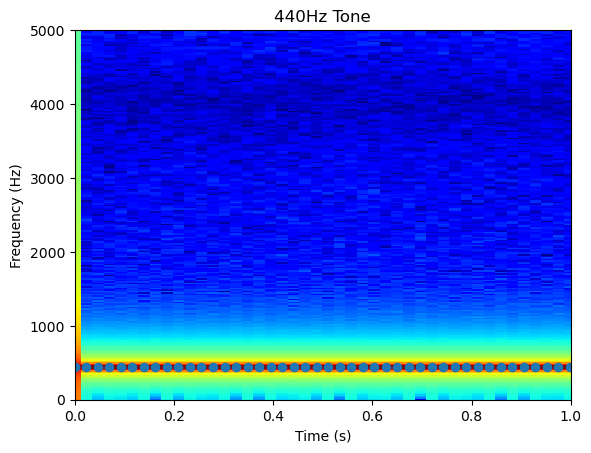

In [109]:
f,t,stft = sig.stft(tone_440,fs_1,nperseg=2048)
pitch, x, notes = run_pitch_detect(tone_440,1024,fs_1)

print("Notes: ", notes)
fig, ax0 = plt.subplots(1, 1)
c = ax0.pcolormesh(t, f, 20*np.log10(np.abs(stft)+0.00000001), cmap = 'jet')
ax0.scatter(x,pitch)
plt.ylim((0,5000))
plt.xlim((0,1))
plt.title("440Hz Tone")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")

### Flute Fmaj Scale

Notes:  ['A♯7', 'A3', 'G2', 'G♯6', 'C-24', 'C-24', 'D6', 'D4', 'C-24', 'C-24', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F♯4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G♯4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A♯4', 'A4', 'A♯4', 'B4', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'B4', 'B4', 'C♯5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'D5', 'E4', 'E4', 'E5', 'E5', 'E5', 'E5', 'E5', 'E5', 'E5', 'E5', 'E5', 'E5', 'E5', 'E5',

Text(0.5, 0, 'Time (s)')

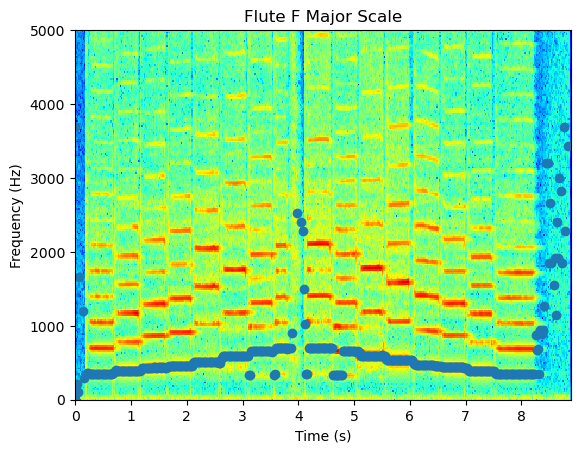

In [112]:
f,t,stft = sig.stft(flute_scale,fs_2,nperseg=2048)
pitch, x, notes = run_pitch_detect(flute_scale,1024,fs_2)

print("Notes: ", notes)

fig, ax0 = plt.subplots(1, 1)
c = ax0.pcolormesh(t, f, 20*np.log10(np.abs(stft)+0.00000001), cmap = 'jet')
ax0.scatter(x,pitch)
plt.ylim((0,5000))
# plt.xlim((0,5))
plt.title("Flute F Major Scale")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")

Notes:  ['F♯10', 'F♯10', 'F♯10', 'F♯10', 'C-24', 'G♯4', 'G♯4', 'G♯4', 'G♯3', 'G♯3', 'G♯3', 'G♯4', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯3', 'G♯4', 'G♯3', 'G♯4', 'G♯3', 'G♯4', 'G♯4', 'G♯4', 'C-24', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10

Text(0.5, 0, 'Time (s)')

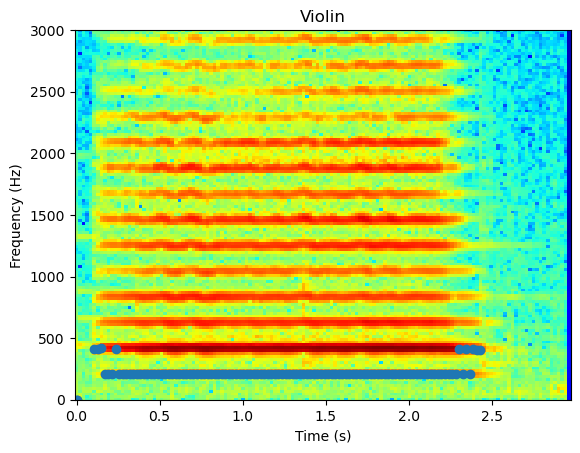

In [114]:
f,t,stft = sig.stft(violin_vib,fs_2,nperseg=2048)
pitch, x, notes = run_pitch_detect(violin_vib,1024,fs_2)

print("Notes: ", notes)

fig, ax0 = plt.subplots(1, 1)
c = ax0.pcolormesh(t, f, 20*np.log10(np.abs(stft)+0.00000001), cmap = 'jet')
ax0.scatter(x,pitch)
plt.ylim((0,3000))
plt.title("Violin")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
# plt.xlim((0,5))

417.39130434782606


Text(0, 0.5, 'Amplitude')

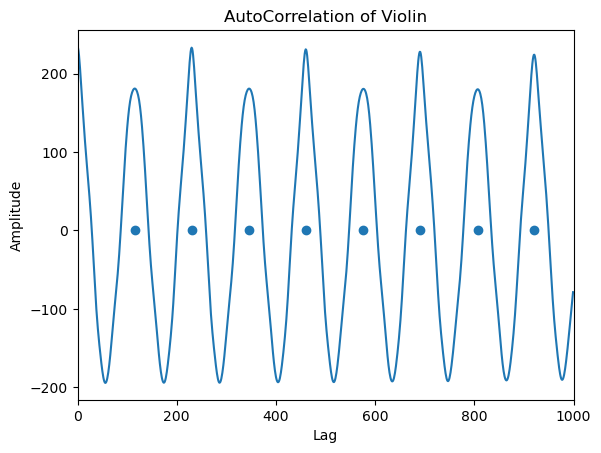

In [116]:
auto = auto_corr(violin_vib)
plt.plot(auto[0:1000])
peaks = sig.find_peaks(auto, height=2.5)[0]
y = (peaks*0)
print(fs_2/peaks[0])
plt.scatter(peaks, y)
plt.xlim([0,1000])
plt.title("AutoCorrelation of Violin")
plt.xlabel("Lag")
plt.ylabel("Amplitude")

Notes:  ['A♯3', 'A♯3', 'A♯3', 'A3', 'A3', 'A4', 'A3', 'A4', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A♯3', 'A♯3', 'A♯3', 'A♯3', 'A♯3', 'A♯3', 'A♯3', 'A3', 'A3', 'A3', 'A♯3', 'A♯3', 'A♯3', 'A♯3', 'A3', 'A3', 'A3', 'A♯3', 'A♯3', 'A♯3', 'A♯3', 'A♯3', 'A♯3', 'A3', 'A3', 'A3', 'A♯3', 'A♯3', 'A♯3', 'A3', 'A3', 'A3', 'A♯3', 'A♯3', 'C-24', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'F♯10', 'C♯4', 'C♯4', 'C4', 'C♯4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'B3', 'B3', 'C4', 'C4', 'C♯4', 'C-24', 'F♯10', 'F♯10', 'F♯10', 'F♯10'

Text(0.5, 0, 'Time (s)')

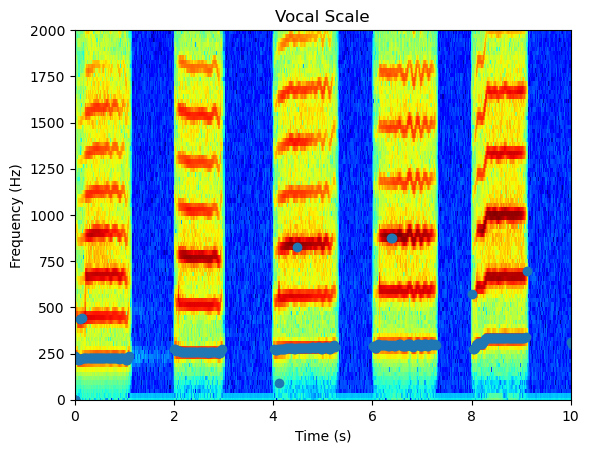

In [128]:
f,t,stft = sig.stft(vocal_scale,fs_2,nperseg=2048)
pitch, x, notes = run_pitch_detect(vocal_scale,1024,fs_2)

# print("Notes: ",notes[0:int(fs_2*10)])
print("Notes: ",notes)

fig, ax0 = plt.subplots(1, 1)
c = ax0.pcolormesh(t, f, 20*np.log10(np.abs(stft)+0.00000001), cmap = 'jet')
ax0.scatter(x,pitch)
plt.ylim((0,2000))
# plt.xlim((5,10))
plt.xlim((0,10))
plt.title("Vocal Scale")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")

## Conclusion
- Seems like the simple pitch detection is relatively accurate
- Is able to follow relatively simple tonal signals, though with some occaisional jumps/inaccuracies
- Gets confused by harmonics

## Future Work
- Investigate other algorithms
- Look into ways to filter, incorporate other known information to refine process
    - Reduce frequency range
    - Incorporate harmonic information
    - Penalize large jumps
    - Be able to handle silence or non-pitched content appropriately
